In [172]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [173]:
data = pd.read_csv("Placement.csv",usecols=['CGPA','IQ'])
data.sample(3)

,CGPA,IQ
25,5.0,91
20,6.6,120
40,4.9,134


In [174]:
x=data.iloc[:,0:1].values
y=data.iloc[:,1:2].values

In [175]:
print(x[0:2])
print(y[0:2])

[[6.8]
 [5.9]]
[[123]
 [106]]


In [43]:
data.shape

(100, 2)

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(90, 1)
(10, 1)
(90, 1)
(10, 1)


# With Sklearn 

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
MAE = mean_absolute_error(ytest,ypred)
print("Mean Absolute Error = ",MAE)
MSE = mean_squared_error(ytest,ypred)
print("Mean Squared Error = ",MSE)
R2 = r2_score(ytest,ypred)
print("R2 score error = ",R2)

Mean Absolute Error =  34.459478743489335
Mean Squared Error =  1785.5465936060555
R2 score error =  -0.20452966459298394


In [149]:
m = lr.coef_
b = lr.intercept_

print("M =",m,"B = ",b)

M = [[-2.9233671]] B =  [143.03012165]


In [150]:
xt = 6.8
yt = m*xt+b
print(yt)

[[123.15122536]]


In [151]:
xtrain.shape[0]

90

In [152]:
ypred

array([[123.73589878],
       [129.58263299],
       [125.48991904],
       [122.56655194],
       [124.61290891],
       [125.48991904],
       [127.82861273],
       [125.19758233],
       [125.48991904],
       [131.62898996]])

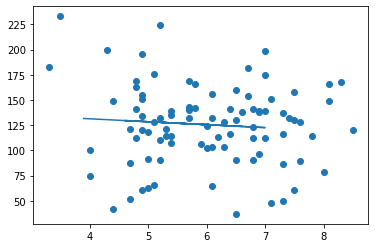

In [153]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain)
plt.plot(xtest,ypred)
plt.show()

# Without Sklearn 

In [160]:
class linearregression:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self,xtrain,ytrain):
        num = 0
        den = 0
        for i in range(xtrain.shape[0]):
            num = num+((xtrain[i]-xtrain.mean())*(ytrain[i]-ytrain.mean()))
            den = den+((xtrain[i]-xtrain.mean())*(xtrain[i]-xtrain.mean()))
        self.m = num/den
        self.b = ytrain.mean()-(self.m*xtrain.mean())
        print("value of m = ",self.m)
        print("value of b = ",self.b)
        
        
    def predicts(self,xtst):
        for i in range(xtest.shape[0]):
            print((self.m*xtest[i])+self.b)
        
        
    def predict(self,xts):
        return (self.m*xts)+self.b
                       

In [161]:
lr = linearregression()

In [162]:
lr.fit(xtrain,ytrain)

value of m =  [-2.9233671]
value of b =  [143.03012165]


In [163]:
lr.predict([6.8])

array([123.15122536])

In [164]:
ypred1 = lr.predicts(xtest)
print(ypred1)

[123.73589878]
[129.58263299]
[125.48991904]
[122.56655194]
[124.61290891]
[125.48991904]
[127.82861273]
[125.19758233]
[125.48991904]
[131.62898996]
None


TypeError: 'NoneType' object is not subscriptable

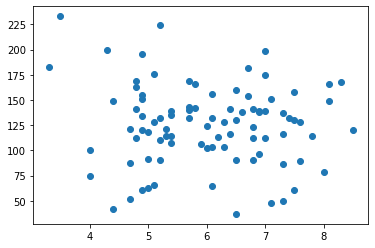

In [171]:
import matplotlib.pyplot as plt 
plt.scatter(xtrain,ytrain)
plt.plot(xtest,ypred1[0:7])
plt.show()